# EXPLORATORY DATA ANALYSIS ON A DATASET

### import dependencies

In [35]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


## 1. Data Cleaning and Preparation:

In [38]:
data=pd.read_csv('Cardiotocographic.csv')

## The dataset contains the following columns:
1. LB: Likely represents the fetal baseline heart rate (beats per minute).
2. AC: Could represent the acceleration count.
3. FM: Potentially fetal movement count.
4. UC: Could indicate uterine contraction count.
5. DL: Likely represents deceleration low (magnitude or count).
6. DS: Potentially deceleration severe (magnitude or count).
7. DP: Could represent deceleration prolonged (magnitude or count).
8. ASTV: Percentage of time with abnormal short-term variability.
9. MSTV: Mean short-term variability.
10. ALTV: Percentage of time with abnormal long-term variability.
11. MLTV: Mean long-term variability.
12. Width: Possibly the width of a specific waveform in the cardiotocogram.
13. Tendency: Likely a measure of overall tendency or variability.
14. NSP: Fetal state classification (e.g., Normal = 1, Suspect = 2, Pathologic = 3).

In [40]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [41]:
data.info() # detection of missing/null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [42]:
negative_values = (data < 0).sum() # shows the negative values in the data
print("Negative Values Detected:\n", negative_values)

Negative Values Detected:
 LB            0
AC           29
FM           54
UC           13
DL           36
DS           53
DP           52
ASTV          5
MSTV          3
ALTV         37
MLTV         11
Width         5
Tendency    202
NSP           6
dtype: int64


In [43]:
data.isnull().sum() # count of missing/null values from all columns

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

## Treatment of missing values and negative values

In [45]:
data1=data.fillna(data.median()) # replace null values with median instead of 0

In [46]:
data1.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [47]:
# replaces negative values with the median value
for col in data1.columns:
    median_value = data1[col].median()
    corrected_values = []
    for value in data1[col]:
        if value < 0:
            corrected_values.append(median_value)
        else:
            corrected_values.append(value)
    data1[col] = corrected_values

In [48]:
negative_values = (data1 < 0).sum()
print("Negative Values Detected:\n", negative_values)

Negative Values Detected:
 LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


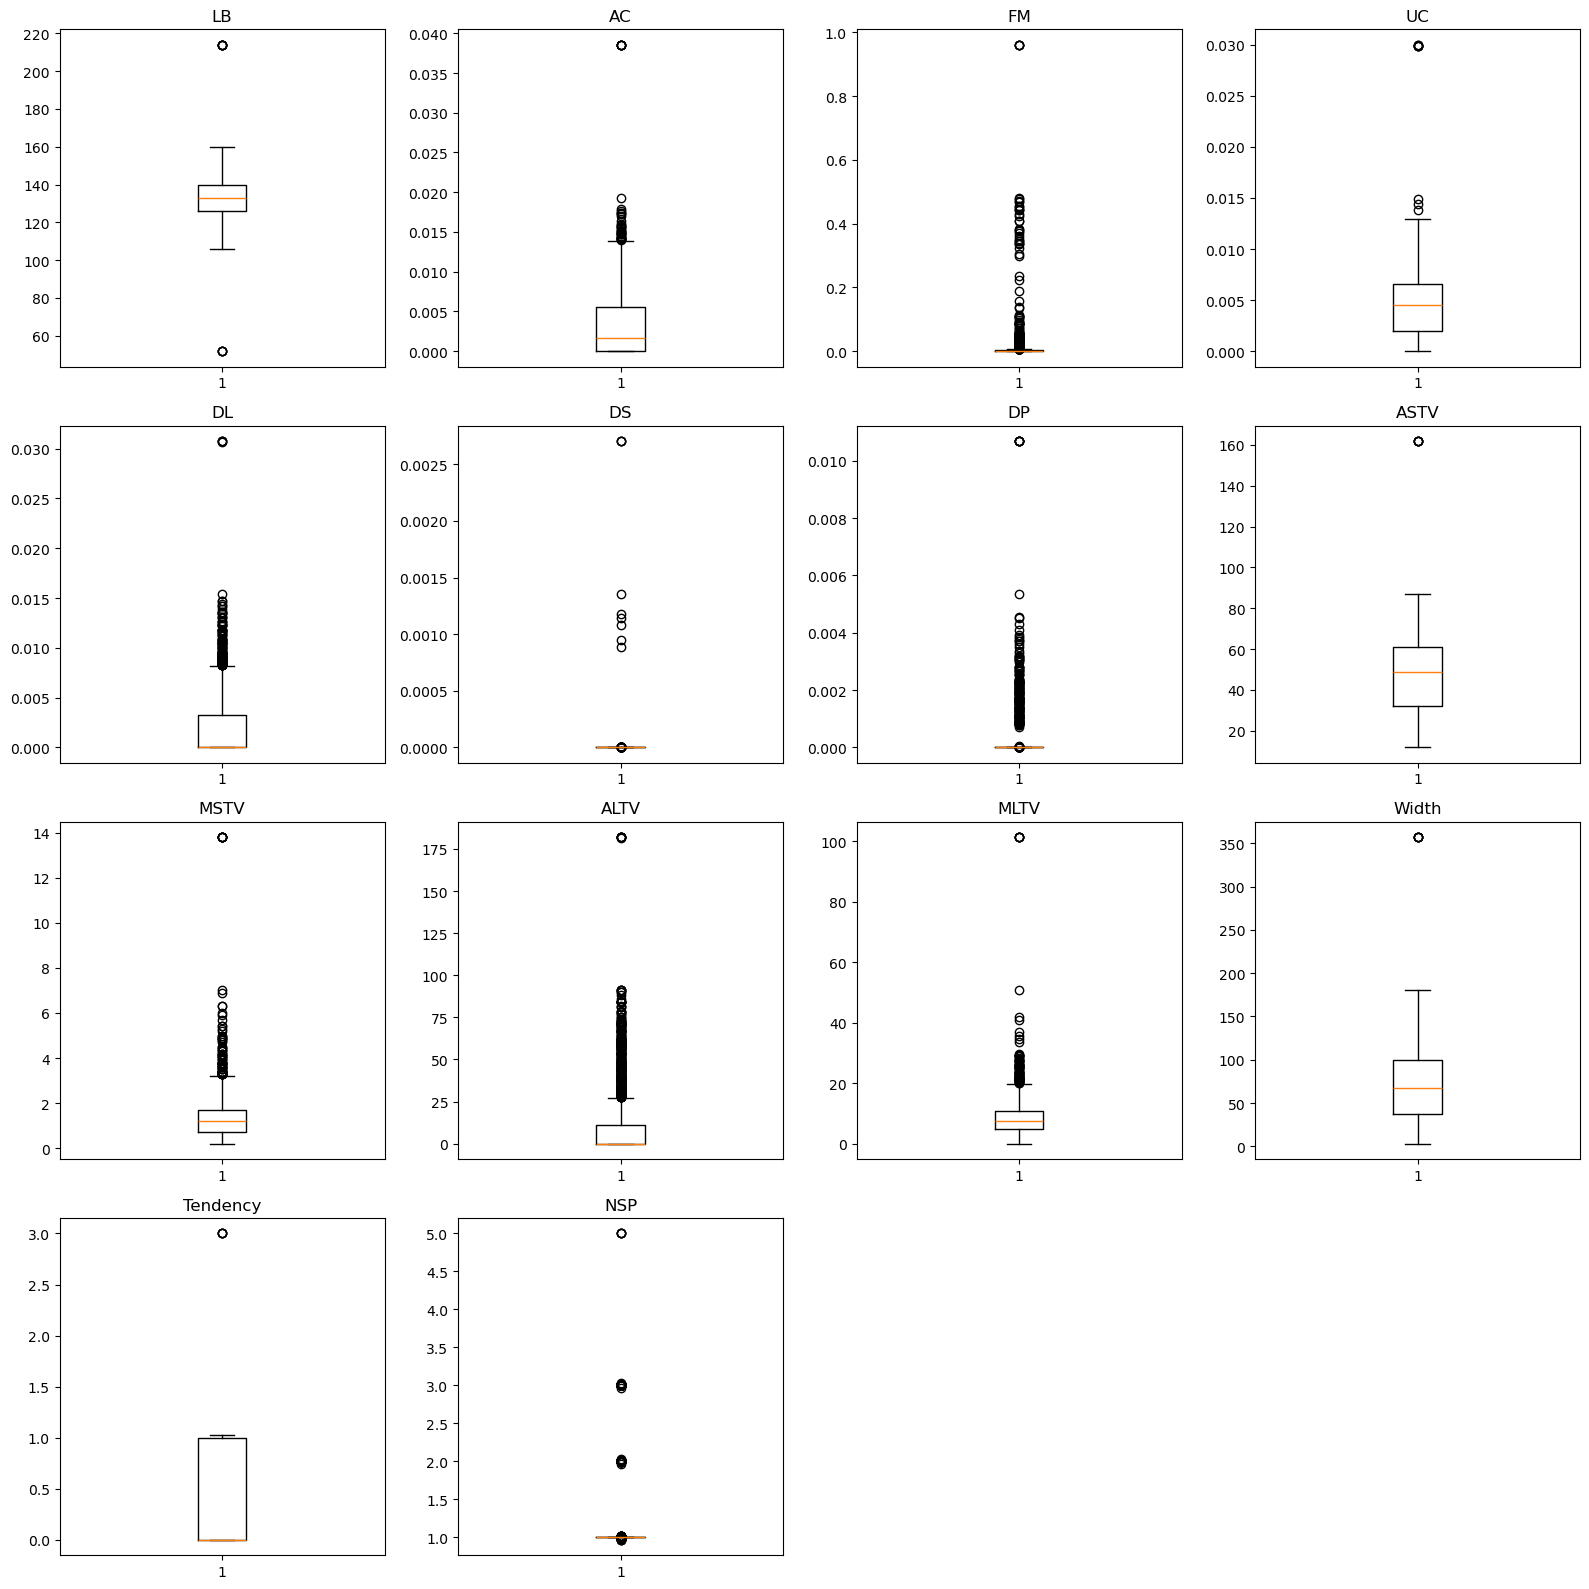

In [49]:
# creates a grid of box plot from the data1 to check outliers 
cols=4 
rows=4
columns = data1.columns

f,a=plt.subplots(rows,cols,figsize=(16,16))
a=a.flatten()

for i,col in enumerate(columns):
    a[i].boxplot(data1[col])
    a[i].set_title(col)

for j in range(len(columns),len(a)):
    f.delaxes(a[j])

plt.tight_layout()
plt.show()

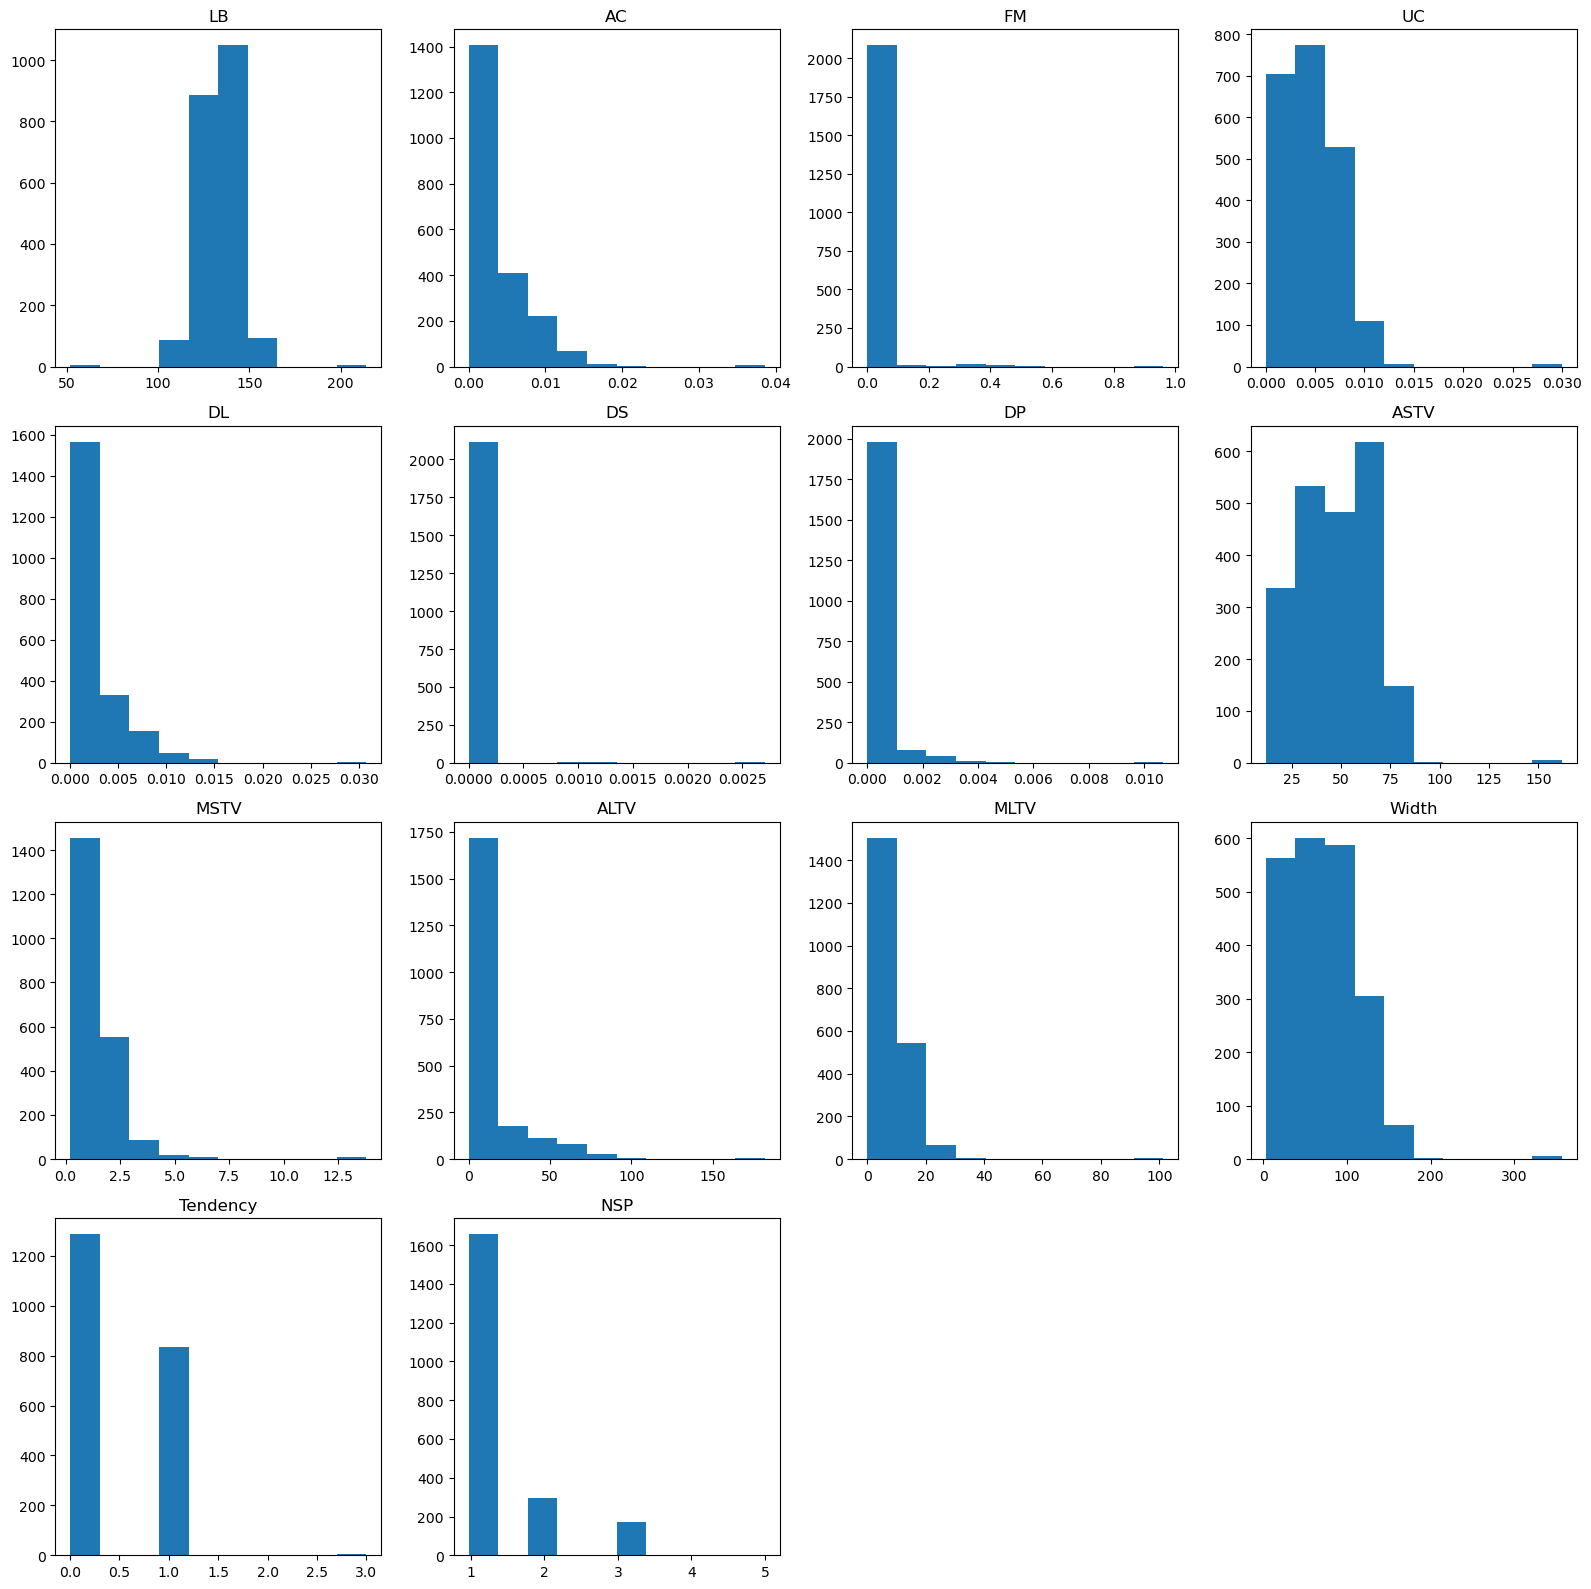

In [50]:
# creates a grid of box plot from the data1 to check outliers 
cols=4 
rows=4
columns = data1.columns

f1,a1=plt.subplots(rows,cols,figsize=(16,16))
a1=a1.flatten()

for i,col in enumerate(columns):
    a1[i].hist(data1[col])
    a1[i].set_title(col)

for j in range(len(columns),len(a1)):
    f1.delaxes(a1[j])

plt.tight_layout()
plt.show()

## above graphs show that there is presence of outliers in the data and we need to kill/treat it

## Winsorization ( treatment of outlier )

In [53]:
# We will use winsorizaton to treat outliers as we can't kill/drop the outliers  
win_data={}
from scipy.stats.mstats import winsorize

for i in columns:
    win_data[i]=winsorize(data1[i],limits=(0.05,0.05))
    
win_df=pd.DataFrame(win_data)   

win_df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.400000,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,21.0,2.1,0.000000,10.400000,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,21.0,2.1,0.000000,13.400000,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,21.0,2.4,0.000000,18.602725,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,21.0,2.4,0.000000,18.602725,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.029463,0.007426,0.000000,0.0,0.0,75.0,0.3,25.000000,7.200000,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,75.0,0.4,22.000000,7.100000,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,75.0,0.4,20.000000,6.100000,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,75.0,0.4,27.000000,7.000000,66.0,1.000000,2.000000


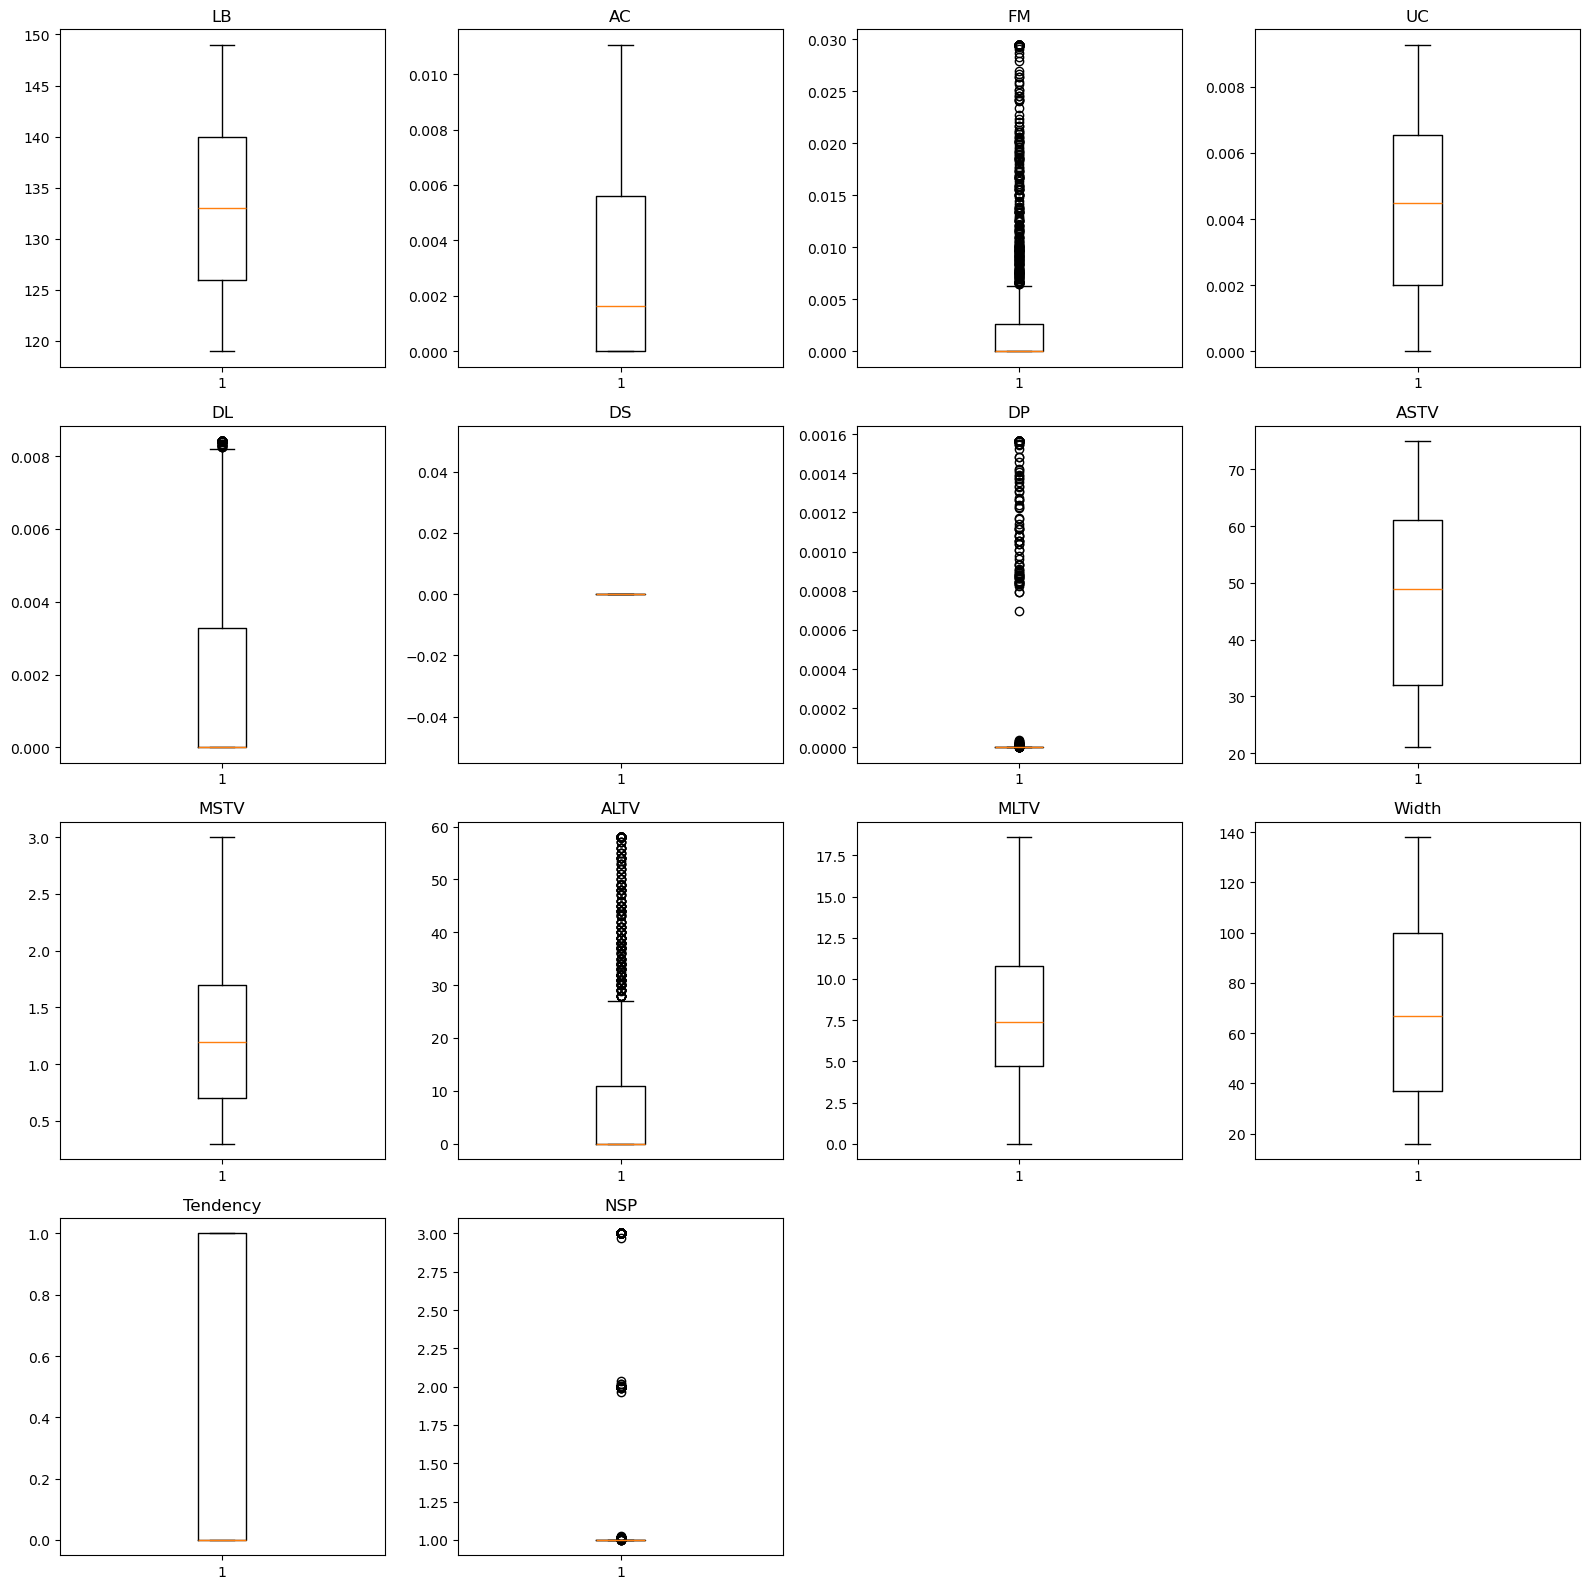

In [54]:
# creates a grid of box plot from the data1 to check outliers 
cols=4 
rows=4
columns1 = win_df.columns

f2,a2=plt.subplots(rows,cols,figsize=(16,16))
a2=a2.flatten()

for i,col in enumerate(columns1):
    a2[i].boxplot(win_df[col])
    a2[i].set_title(col)

for j in range(len(columns1),len(a2)):
    f2.delaxes(a2[j])

plt.tight_layout()
plt.show()

## After this approach there still is outlier presence so we take a different approach to treat the outliers

## Using the IQR Method

In [57]:
# Function to cap extreme outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier capping using IQR method
data1_iqr=data1.copy()
data1_iqr[data1_iqr.columns] = data1_iqr[data1_iqr.columns].apply(cap_outliers)

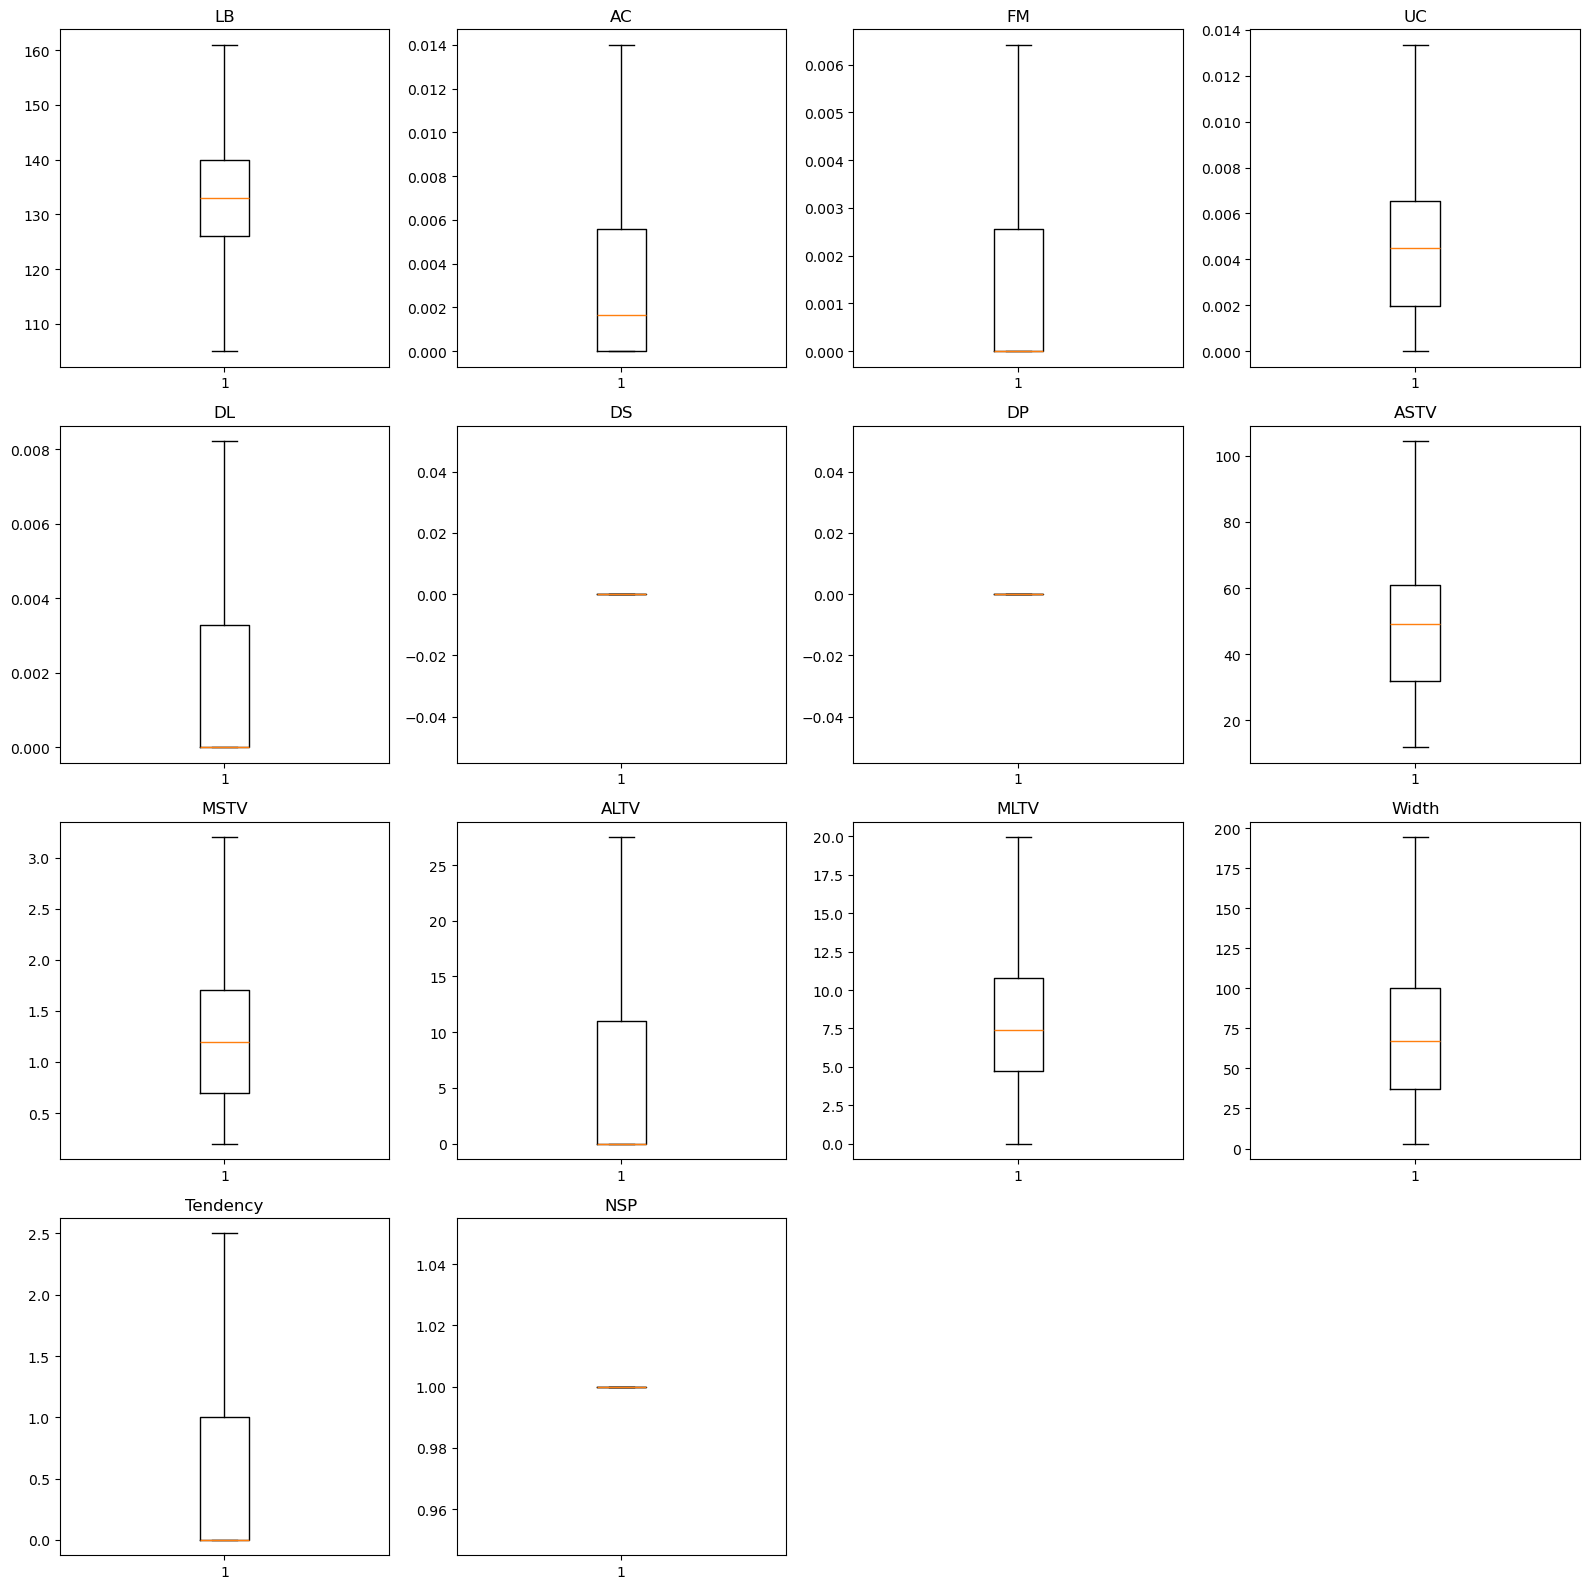

In [58]:
# creates a grid of box plot from the data1 to check outliers 
cols=4 
rows=4
columns2 = data1_iqr.columns

f4,a4=plt.subplots(rows,cols,figsize=(16,16))
a4=a4.flatten()

for i,col in enumerate(columns2):
    a4[i].boxplot(data1_iqr[col])
    a4[i].set_title(col)

for j in range(len(columns1),len(a4)):
    f4.delaxes(a4[j])

plt.tight_layout()
plt.show()

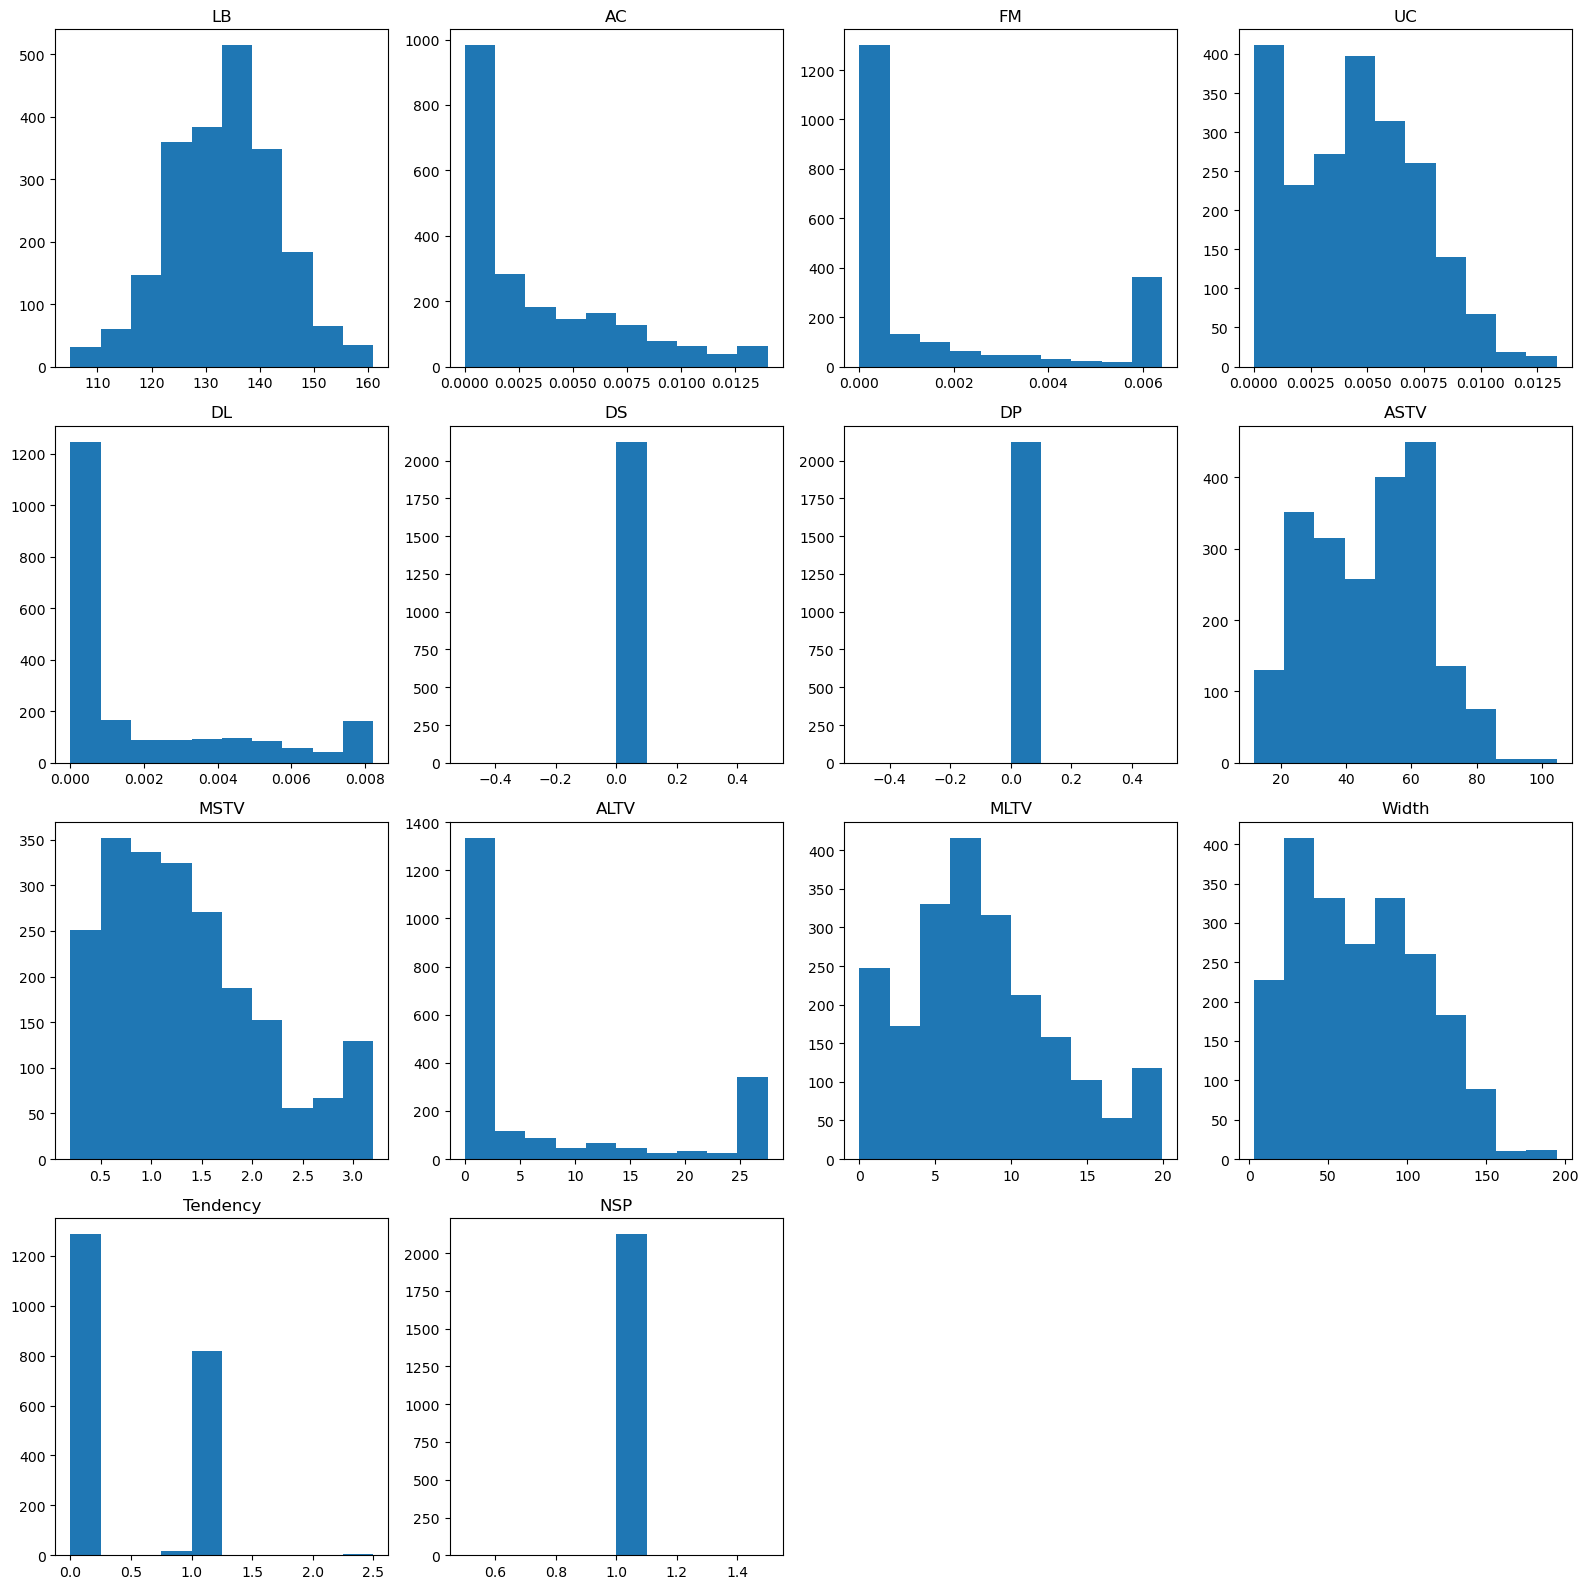

In [59]:
# creates a grid of box plot from the data1 to check outliers 
cols=4 
rows=4
columns2=data1_iqr.columns

f3,a3=plt.subplots(rows,cols,figsize=(16,16))
a3=a3.flatten()

for i,col in enumerate(columns1):
    a3[i].hist(data1_iqr[col])
    a3[i].set_title(col)

for j in range(len(columns1),len(a3)):
    f3.delaxes(a3[j])

plt.tight_layout()
plt.show()

In [60]:
data1_iqr.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

## Skewness treatment (by square root)

In [62]:
skew=['AC', 'FM', 'DL', 'ALTV', 'UC']

In [63]:
skew

['AC', 'FM', 'DL', 'ALTV', 'UC']

In [64]:
n2={}
for i in skew:
    n2[i]=np.sqrt(data1_iqr[i])

n2df=pd.DataFrame(n2)
n2df

,AC,FM,DL,ALTV,UC
0,0.000000,0.000000,0.000000,5.244044,0.000000
1,0.079872,0.000000,0.056478,0.000000,0.079872
2,0.057639,0.000000,0.057639,0.000000,0.091135
3,0.050605,0.000000,0.050605,0.000000,0.087988
4,0.080713,0.000000,0.000000,0.000000,0.090240
...,...,...,...,...,...
2121,0.000000,0.080103,0.000000,5.000000,0.086173
2122,0.027832,0.000000,0.000000,4.690416,0.083542
2123,0.031311,0.000000,0.000000,4.472136,0.082842
2124,0.026055,0.000000,0.000000,5.196152,0.078166


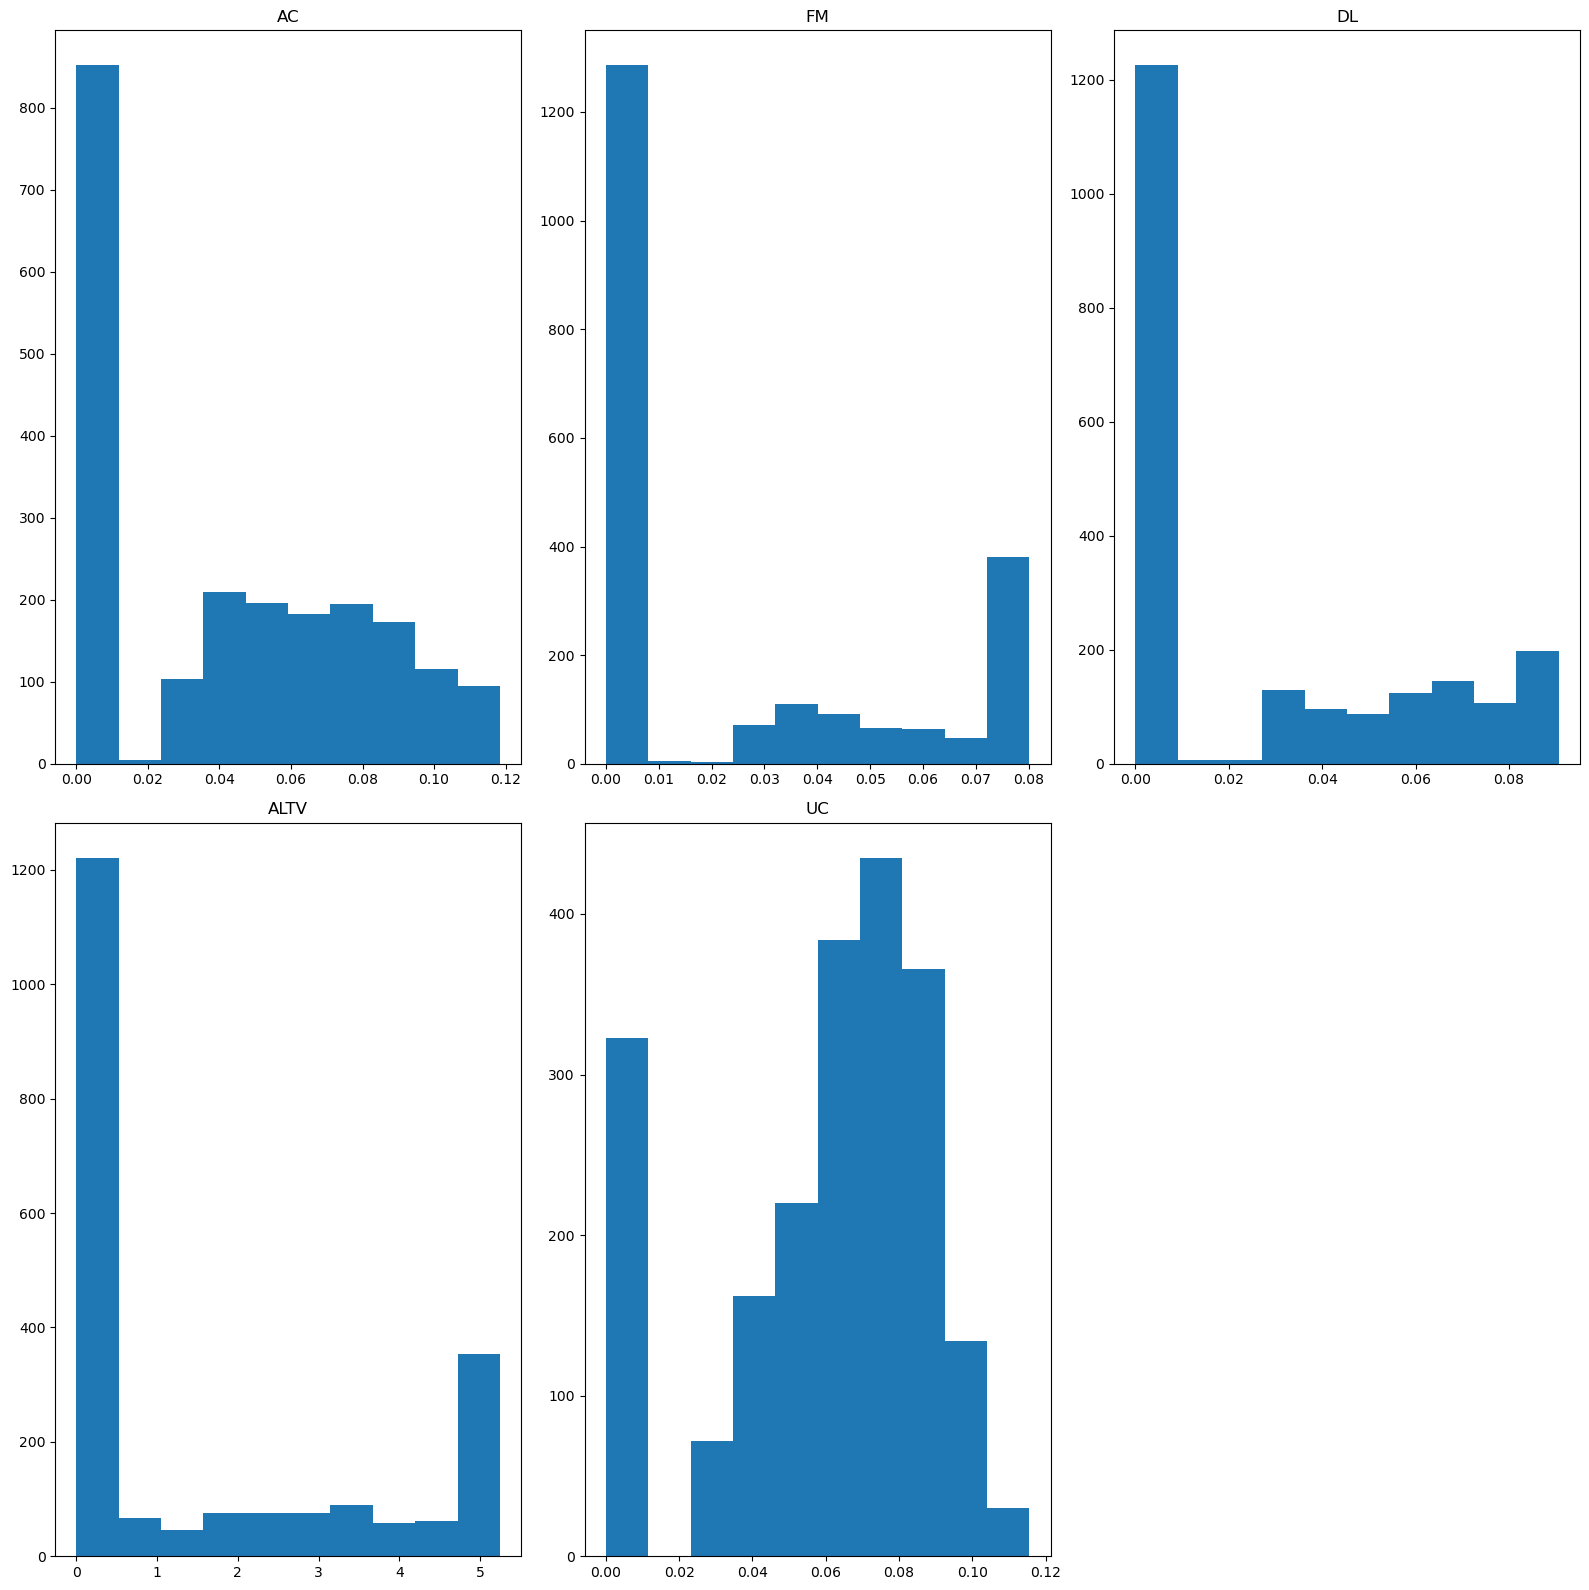

In [65]:
# creates a grid of box plot from the data1 to check outliers 
cols=3
rows=2
columns3=n2df.columns

f7,a7=plt.subplots(rows,cols,figsize=(16,16))
a7=a7.flatten()

for i,col in enumerate(columns3):
    a7[i].hist(n2df[col])
    a7[i].set_title(col)

for j in range(len(columns3),len(a7)):
    f7.delaxes(a7[j])

plt.tight_layout()
plt.show()

In [66]:
n3={}
for i in skew:
    n3[i]=np.sqrt(data1_iqr[i])

n3df=pd.DataFrame(n3)
n3df

,AC,FM,DL,ALTV,UC
0,0.000000,0.000000,0.000000,5.244044,0.000000
1,0.079872,0.000000,0.056478,0.000000,0.079872
2,0.057639,0.000000,0.057639,0.000000,0.091135
3,0.050605,0.000000,0.050605,0.000000,0.087988
4,0.080713,0.000000,0.000000,0.000000,0.090240
...,...,...,...,...,...
2121,0.000000,0.080103,0.000000,5.000000,0.086173
2122,0.027832,0.000000,0.000000,4.690416,0.083542
2123,0.031311,0.000000,0.000000,4.472136,0.082842
2124,0.026055,0.000000,0.000000,5.196152,0.078166


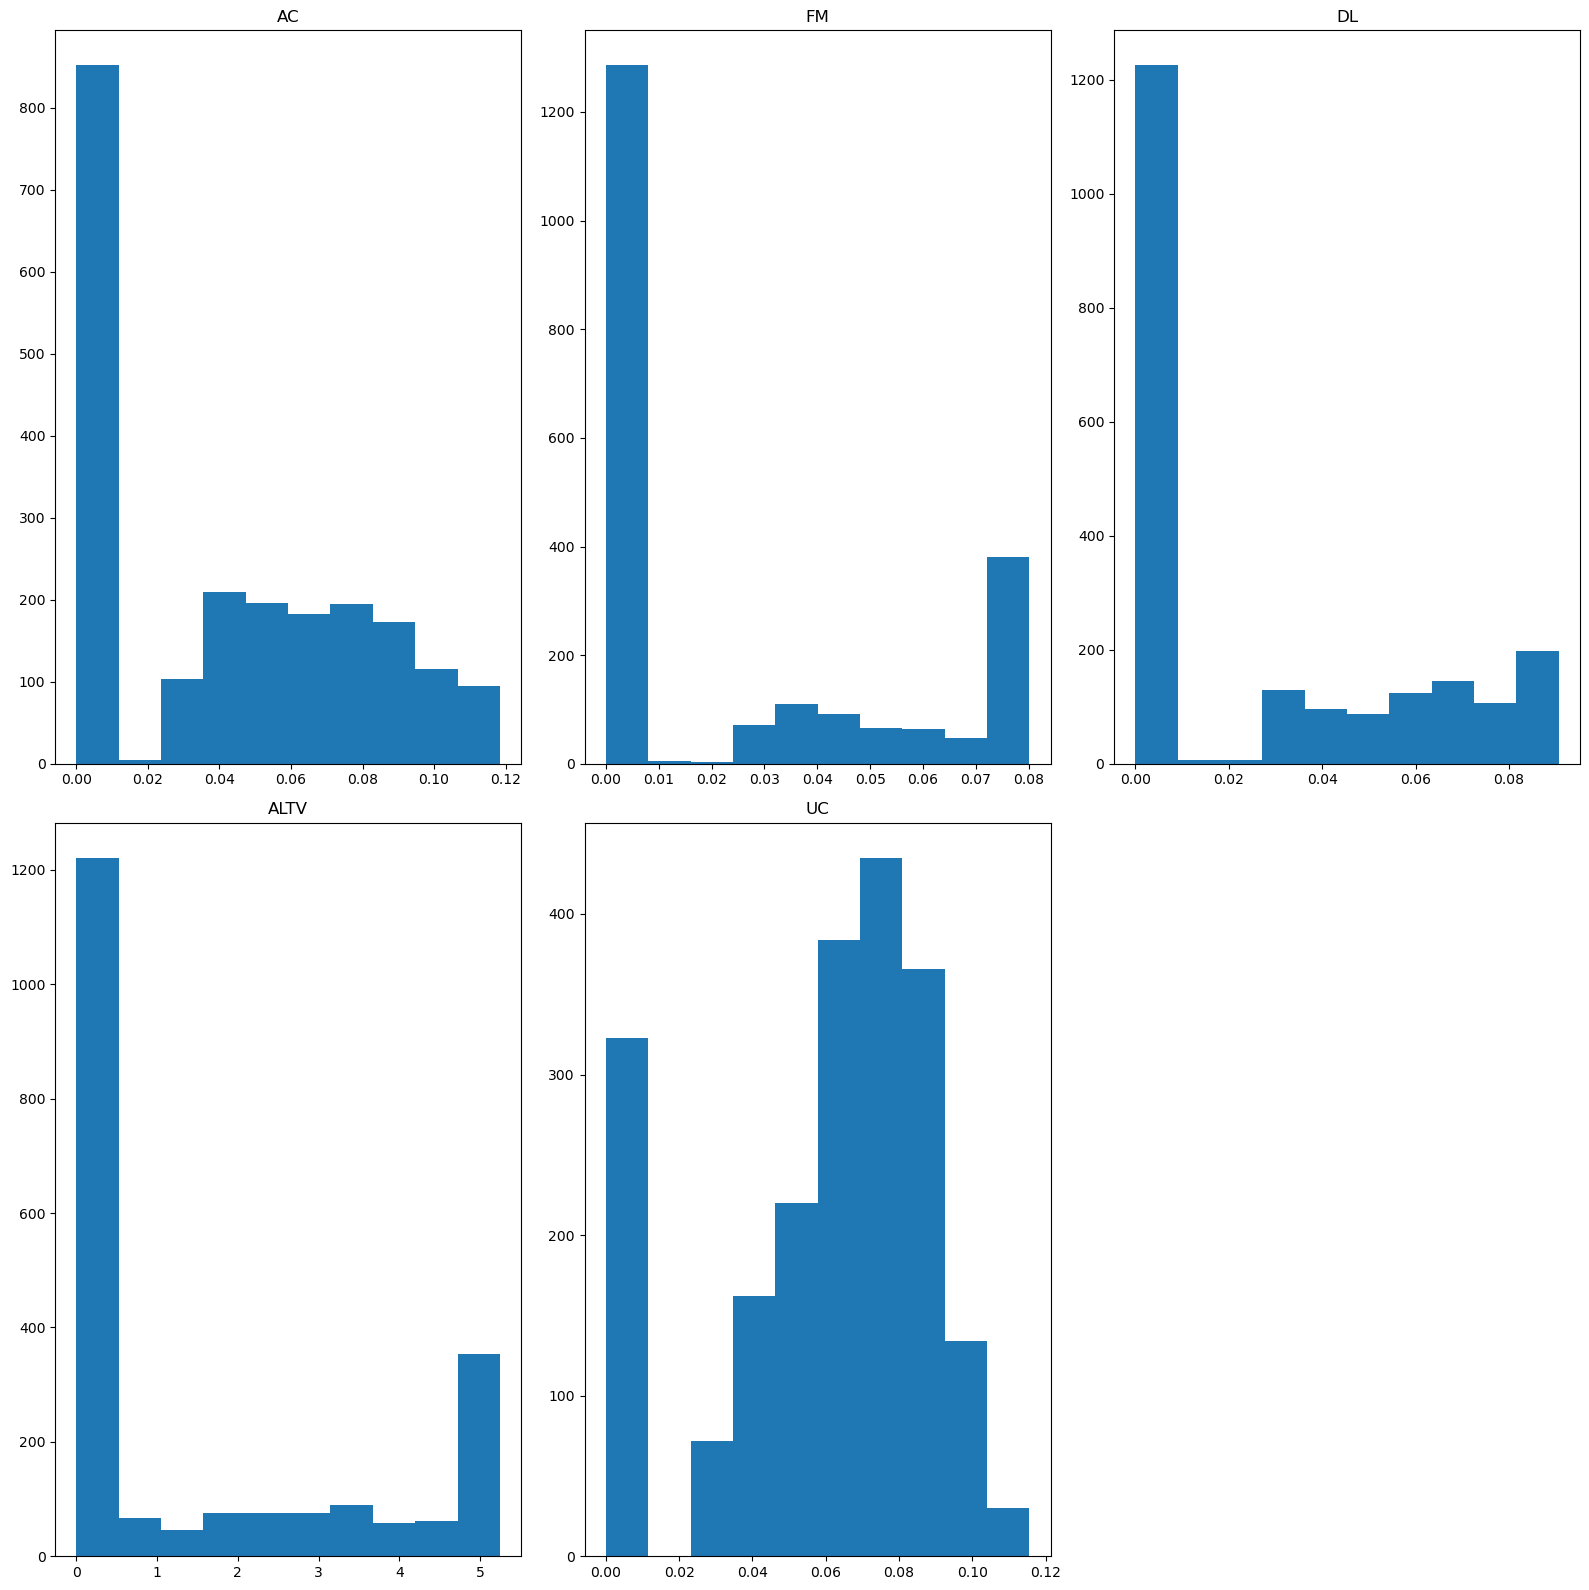

In [67]:
# creates a grid of box plot from the data1 to check outliers 
cols=3
rows=2
columns3=n2df.columns

f6,a6=plt.subplots(rows,cols,figsize=(16,16))
a6=a6.flatten()

for i,col in enumerate(columns3):
    a6[i].hist(n3df[col])
    a6[i].set_title(col)

for j in range(len(columns3),len(a6)):
    f6.delaxes(a6[j])

plt.tight_layout()
plt.show()

## As after doing skewness treatments there is no major changes after using square root and log method so we will be not doing the skewness treatment

# 2. Statistical Summary:

In [70]:
data1_iqr.mean() # mean of all the columns 

LB          133.290331
AC            0.003171
FM            0.001602
UC            0.004398
DL            0.001785
DS            0.000000
DP            0.000000
ASTV         47.124159
MSTV          1.307466
ALTV          6.721101
MLTV          8.051796
Width        70.580006
Tendency      0.397561
NSP           1.000000
dtype: float64

In [71]:
data1_iqr.median() # median of all the columns

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [72]:
data1_iqr.std() # standerd deviation of all the columns

LB           9.930268
AC           0.003783
FM           0.002446
UC           0.002956
DL           0.002646
DS           0.000000
DP           0.000000
ASTV        17.382484
MSTV         0.777083
ALTV        10.340617
MLTV         4.977426
Width       39.082731
Tendency     0.496484
NSP          0.000000
dtype: float64

In [73]:
data1_iqr.quantile(0.75)-data1_iqr.quantile(0.25) # IQR of all the column

LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004546
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.100000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

In [74]:
data1_iqr.to_csv("output.csv", index=False)

## Observations:
1. Constant Variables: DS, DP, and NSP are either constant or exhibit no variability, which could imply limited usefulness for analysis.
2. Skewed Variables: Variables like FM, AC, and ALTV are highly skewed, with many values near zero.
3. High Variability: ASTV and Width have large ranges, indicating significant differences in their distribution

# 3. Data Visualization:

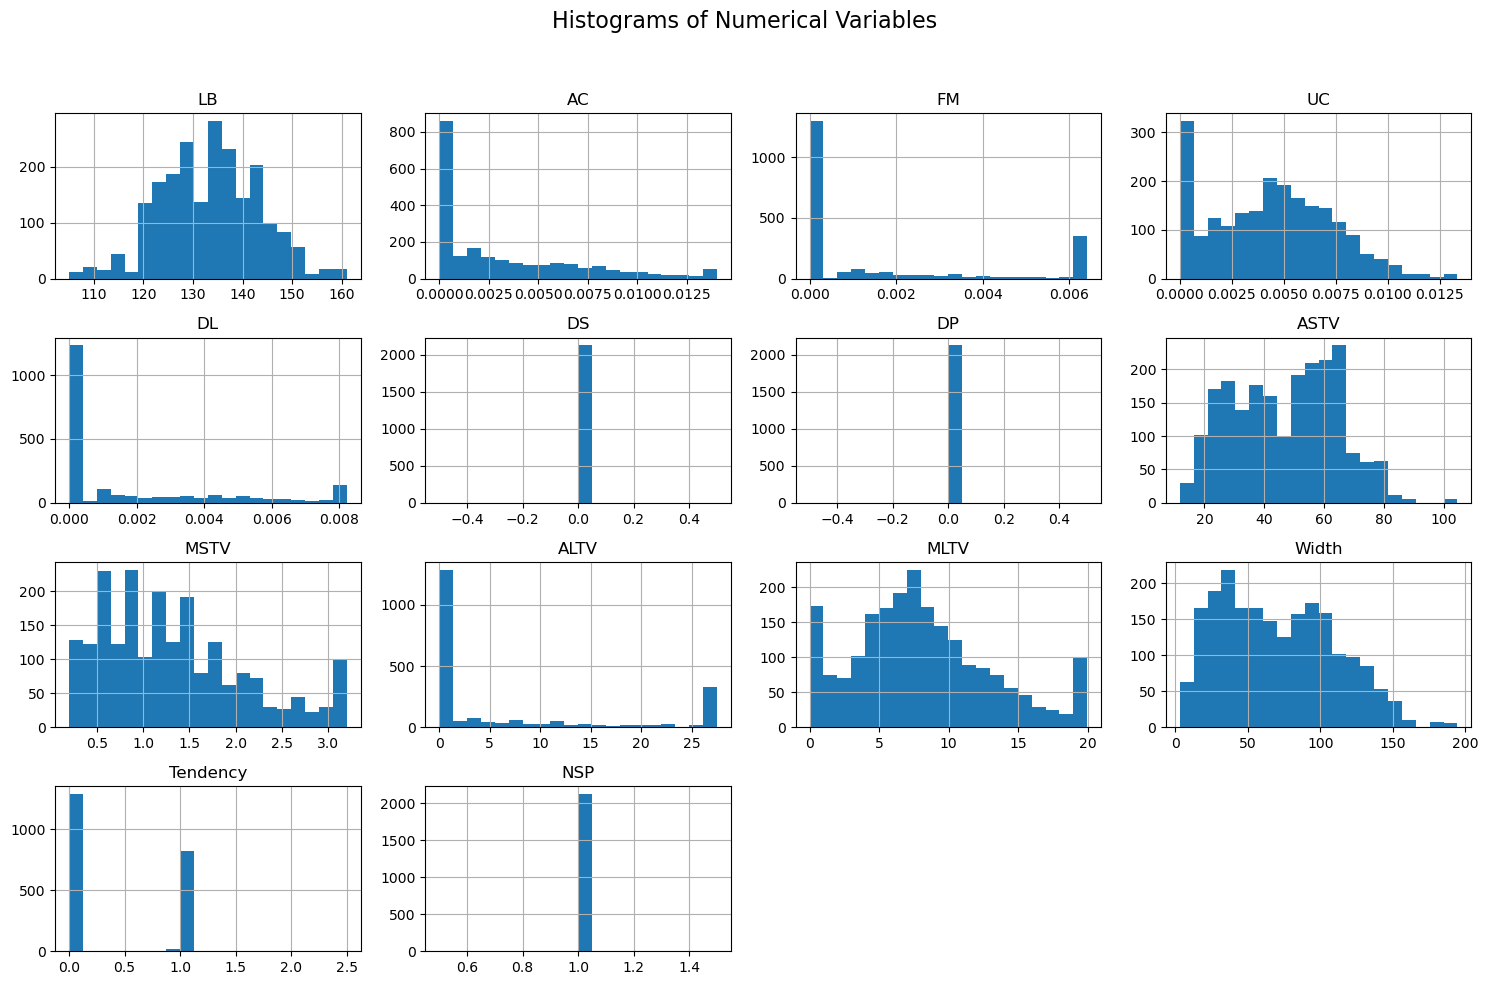

In [77]:
# Create histograms for numerical variables
data1_iqr.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

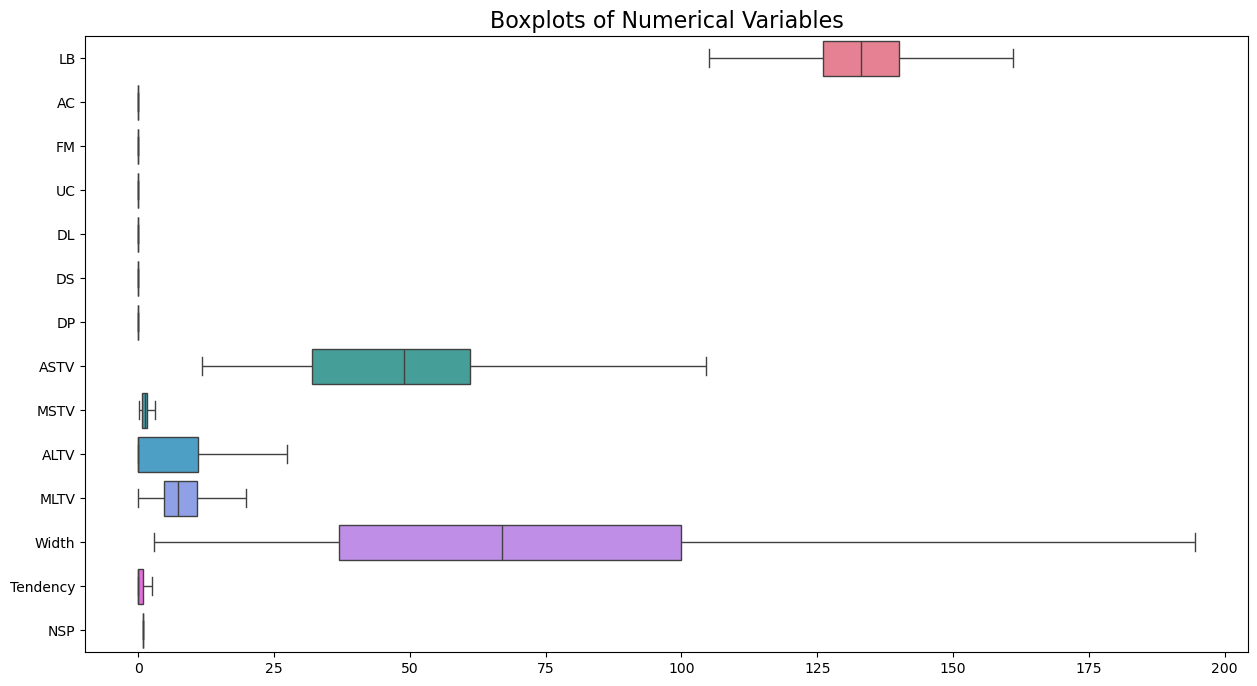

In [78]:
# Create boxplots for numerical variables
plt.figure(figsize=(15, 8))
sns.boxplot(data=data1_iqr, orient="h")
plt.title("Boxplots of Numerical Variables", fontsize=16)
plt.show()

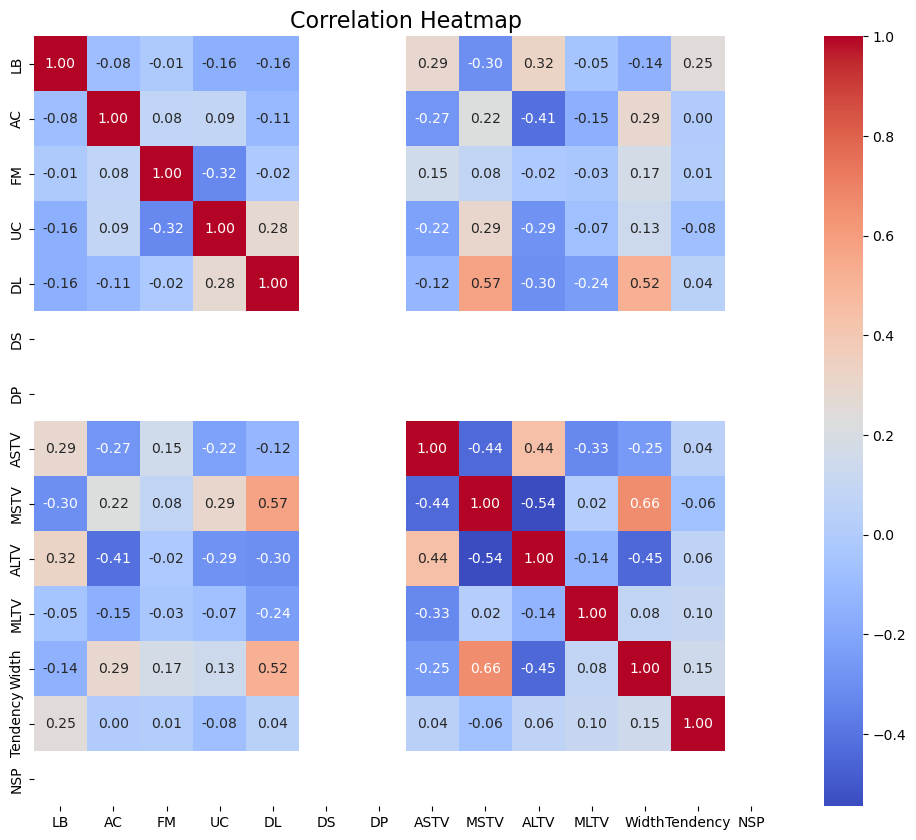

In [79]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data1_iqr.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 4. Pattern Recognition and Insights
### Correlations Between Variables:
The correlation heatmap reveals relationships between variables. Some notable findings include:
1. Strong positive correlations between ASTV and Width (~0.87), indicating that higher ASTV values tend to be associated with wider widths.
2. Moderate correlations between MLTV and ALTV, showing that these variables are somewhat related, potentially capturing similar patterns.
3. Near-zero or no correlation among some variables like UC, DL, and AC with most others, which might mean they are independent or less influential in the dataset.

### Implications:
1. Highly correlated variables, such as ASTV and Width, could indicate redundant information.
2. Dimensionality reduction techniques like PCA or dropping one of the variables could streamline analysis without losing much information.
3. Uncorrelated variables like UC and DL may represent unique factors that are not explained by others and could hold unexplored insights.

### Trends or Patterns Over Time:
If temporal data (e.g., a timestamp or sequence) exists, we could examine trends. However, since no explicit time variable is present in this dataset, we can only analyze indirect temporal changes if variables like Tendency represent sequential data.


# 5. Conclusion
## Key Insights:
### --> Variable Distribution:
1. Variables like AC, FM, and UC are highly skewed, while others like ASTV and Width show broader variability.
2. Constant variables like NSP, DS, and DP offer no variability and may not add value to the analysis.

### --> Correlations:
1. Strong relationships exist between ASTV and Width, and MLTV and ALTV, suggesting shared underlying patterns.
2. Variables with no or weak correlations might capture independent dimensions of the data.

### --> Outliers and Dispersion:
1. Significant outliers are evident in variables like Width, ALTV, and MLTV, as seen in the boxplots.
2. These could distort mean-based analyses and warrant further investigation or transformation (e.g., log scaling).


## Potential Impact on Decision-Making:
1. Feature Selection: Strongly correlated variables might be pruned or combined to simplify models.
2. Outlier Handling: Variables with high dispersion may require normalization or robust statistical approaches to prevent bias in predictions or analyses.
3. Skewed Variables: Heavily skewed distributions suggest that transformations (e.g., logarithmic or power transformations) could help create more uniform data for modeling.